In [ ]:
!pip install memory_profiler


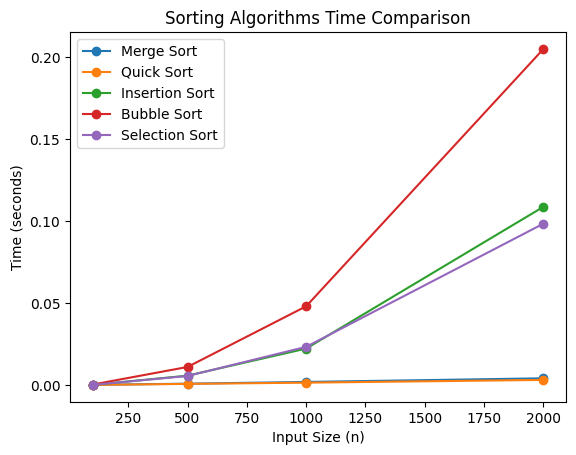

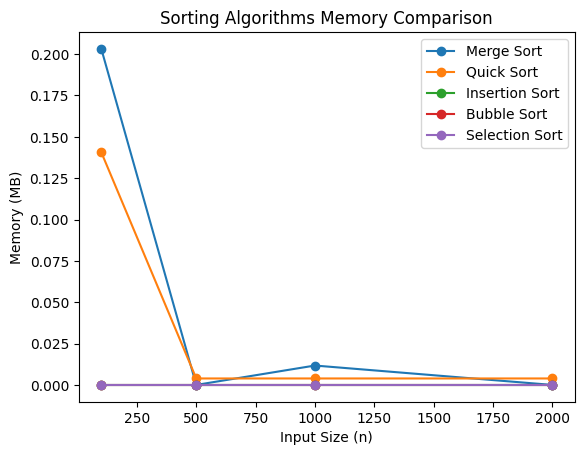

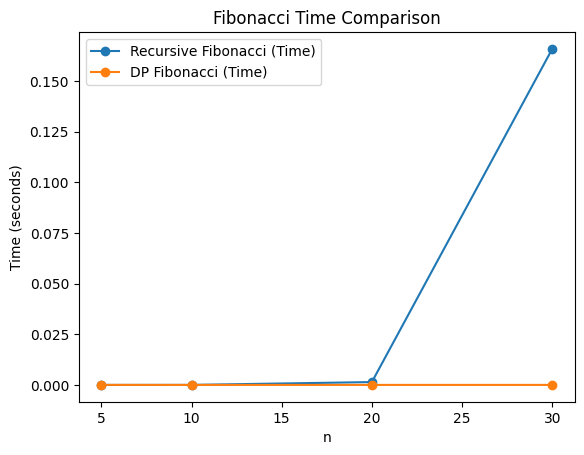

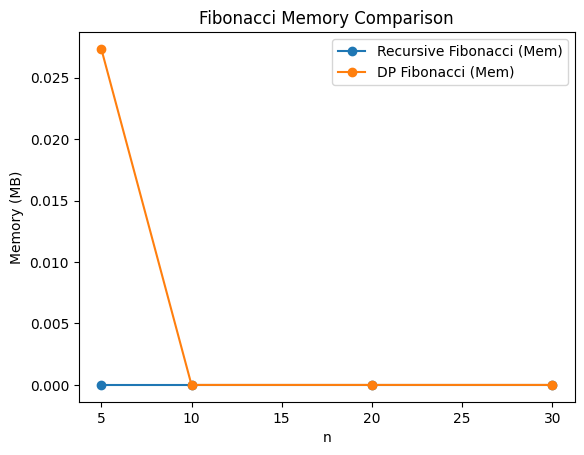

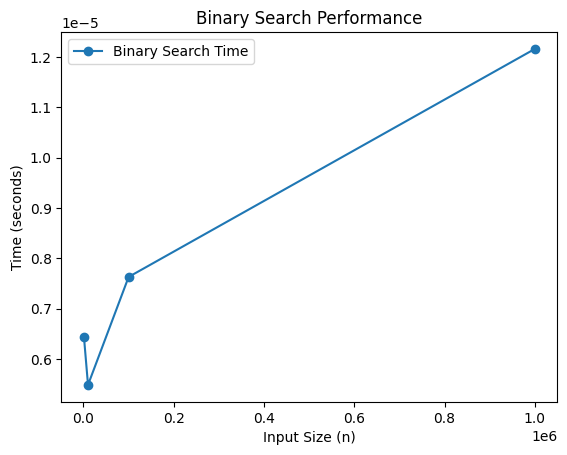

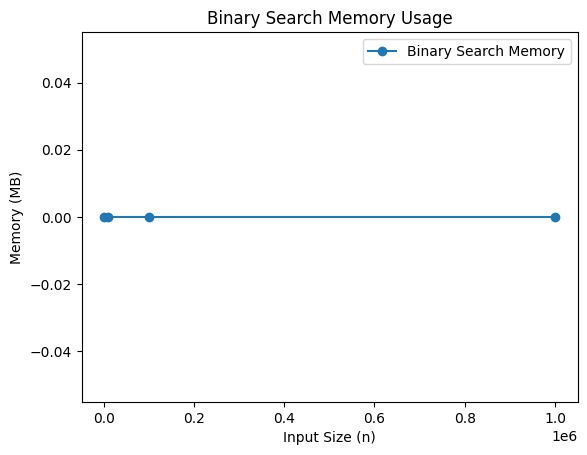

Algorithm            Best         Average      Worst        Space       
----------------------------------------------------------------------
Fibonacci Recursive  -            -            O(2^n)       O(n)        
Fibonacci DP         O(n)         O(n)         O(n)         O(1)        
Merge Sort           O(n log n)   O(n log n)   O(n log n)   O(n)        
Quick Sort           O(n log n)   O(n log n)   O(n^2)       O(log n)    
Insertion Sort       O(n)         O(n^2)       O(n^2)       O(1)        
Bubble Sort          O(n)         O(n^2)       O(n^2)       O(1)        
Selection Sort       O(n^2)       O(n^2)       O(n^2)       O(1)        
Binary Search        O(1)         O(log n)     O(log n)     O(1)        

EXPERIMENTAL SUMMARY (Sorting Algorithms):
   Input Size  Merge Sort Time  Quick Sort Time  Insertion Sort Time  \
0        1000         0.000206         0.000146             0.000173   
1       10000         0.000906         0.000781             0.005794   
2      10000

In [ ]:
# ============================================
# ALGORITHM EFFICIENCY MINI PROJECT
# ============================================

import time
import random
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6)))
import pandas as pd
from memory_profiler import memory_usage

# ----------------------------
# TASK 2: ALGORITHM IMPLEMENTATIONS
# ----------------------------

def fib_recursive(n):
    if n <= 1:
        return n
    return fib_recursive(n-1) + fib_recursive(n-2)

def fib_dp(n):
    if n <= 1:
        return n
    a, b = 0, 1
    for _ in range(2, n+1):
        a, b = b, a+b
    return b

def merge_sort(arr):
    if len(arr) <= 1:
        return arr
    mid = len(arr)//2
    left = merge_sort(arr[:mid])
    right = merge_sort(arr[mid:])
    return merge(left, right)

def merge(left, right):
    res = []
    i = j = 0
    while i < len(left) and j < len(right):
        if left[i] < right[j]:
            res.append(left[i])
            i += 1
        else:
            res.append(right[j])
            j += 1
    res.extend(left[i:])
    res.extend(right[j:])
    return res

def quick_sort(arr):
    if len(arr) <= 1:
        return arr
    pivot = arr[len(arr)//2]
    left = [x for x in arr if x < pivot]
    mid = [x for x in arr if x == pivot]
    right = [x for x in arr if x > pivot]
    return quick_sort(left) + mid + quick_sort(right)

def insertion_sort(arr):
    for i in range(1, len(arr)):
        key = arr[i]
        j = i-1
        while j >= 0 and arr[j] > key:
            arr[j+1] = arr[j]
            j -= 1
        arr[j+1] = key
    return arr

def bubble_sort(arr):
    n = len(arr)
    for i in range(n):
        for j in range(0, n-i-1):
            if arr[j] > arr[j+1]:
                arr[j], arr[j+1] = arr[j+1], arr[j]
    return arr

def selection_sort(arr):
    n = len(arr)
    for i in range(n):
        min_idx = i
        for j in range(i+1, n):
            if arr[j] < arr[min_idx]:
                min_idx = j
        arr[i], arr[min_idx] = arr[min_idx], arr[i]
    return arr

def binary_search(arr, target):
    low, high = 0, len(arr)-1
    while low <= high:
        mid = (low+high)//2
        if arr[mid] == target:
            return mid
        elif arr[mid] < target:
            low = mid+1
        else:
            high = mid-1
    return -1

# ----------------------------
# TASK 3: PROFILING FUNCTIONS
# ----------------------------

def measure_time(func, *args, **kwargs):
    start = time.time()
    func(*args, **kwargs)
    end = time.time()
    return end - start

def measure_memory(func, *args, **kwargs):
    mem_usage = memory_usage((func, args, kwargs), max_iterations=1, interval=0.01)
    return max(mem_usage) - min(mem_usage)

# ----------------------------
# SORTING ALGORITHMS: TIME & MEMORY
# ----------------------------

sizes = [100, 500, 1000, 2000]
algorithms = {
    "Merge Sort": merge_sort,
    "Quick Sort": quick_sort,
    "Insertion Sort": insertion_sort,
    "Bubble Sort": bubble_sort,
    "Selection Sort": selection_sort
}

time_results = {name: [] for name in algorithms}
memory_results = {name: [] for name in algorithms}

for n in sizes:
    arr = [random.randint(0,10000) for _ in range(n)]
    for name, func in algorithms.items():
        t = measure_time(func, arr[:])
        m = measure_memory(func, arr[:])
        time_results[name].append(t)
        memory_results[name].append(m)

# --- Plot Sorting Time ---
for name, times in time_results.items():
    plt.plot(sizes, times, marker="o", label=name)
plt.xlabel("Input Size (n)")
plt.ylabel("Time (seconds)")
plt.title("Sorting Algorithms Time Comparison")
plt.legend()
plt.show()

# --- Plot Sorting Memory ---
for name, mems in memory_results.items():
    plt.plot(sizes, mems, marker="o", label=name)
plt.xlabel("Input Size (n)")
plt.ylabel("Memory (MB)")
plt.title("Sorting Algorithms Memory Comparison")
plt.legend()
plt.show()

# ----------------------------
# FIBONACCI: RECURSIVE vs DP
# ----------------------------
ns = [5, 10, 20, 30]
times_rec, times_dp = [], []
mem_rec, mem_dp = [], []

for n in ns:
    t = measure_time(fib_recursive, n)
    m = measure_memory(fib_recursive, n)
    times_rec.append(t)
    mem_rec.append(m)

    t = measure_time(fib_dp, n)
    m = measure_memory(fib_dp, n)
    times_dp.append(t)
    mem_dp.append(m)

plt.plot(ns, times_rec, marker="o", label="Recursive Fibonacci (Time)")
plt.plot(ns, times_dp, marker="o", label="DP Fibonacci (Time)")
plt.xlabel("n")
plt.ylabel("Time (seconds)")
plt.title("Fibonacci Time Comparison")
plt.legend()
plt.show()

plt.plot(ns, mem_rec, marker="o", label="Recursive Fibonacci (Mem)")
plt.plot(ns, mem_dp, marker="o", label="DP Fibonacci (Mem)")
plt.xlabel("n")
plt.ylabel("Memory (MB)")
plt.title("Fibonacci Memory Comparison")
plt.legend()
plt.show()

# ----------------------------
# BINARY SEARCH
# ----------------------------
sizes = [10**3, 10**4, 10**5, 10**6]
times_bs, mem_bs = [], []

for n in sizes:
    arr = list(range(n))
    target = n-1
    times_bs.append(measure_time(binary_search, arr, target))
    mem_bs.append(measure_memory(binary_search, arr, target))

plt.plot(sizes, times_bs, marker="o", label="Binary Search Time")
plt.xlabel("Input Size (n)")
plt.ylabel("Time (seconds)")
plt.title("Binary Search Performance")
plt.legend()
plt.show()

plt.plot(sizes, mem_bs, marker="o", label="Binary Search Memory")
plt.xlabel("Input Size (n)")
plt.ylabel("Memory (MB)")
plt.title("Binary Search Memory Usage")
plt.legend()
plt.show()

# ----------------------------
# COMPLEXITY TABLE (THEORETICAL)
# ----------------------------
print("{:<20} {:<12} {:<12} {:<12} {:<12}".format("Algorithm", "Best", "Average", "Worst", "Space"))
print("-"*70)
print("Fibonacci Recursive  {:<12} {:<12} {:<12} {:<12}".format("-", "-", "O(2^n)", "O(n)"))
print("Fibonacci DP         {:<12} {:<12} {:<12} {:<12}".format("O(n)", "O(n)", "O(n)", "O(1)"))
print("Merge Sort           {:<12} {:<12} {:<12} {:<12}".format("O(n log n)", "O(n log n)", "O(n log n)", "O(n)"))
print("Quick Sort           {:<12} {:<12} {:<12} {:<12}".format("O(n log n)", "O(n log n)", "O(n^2)", "O(log n)"))
print("Insertion Sort       {:<12} {:<12} {:<12} {:<12}".format("O(n)", "O(n^2)", "O(n^2)", "O(1)"))
print("Bubble Sort          {:<12} {:<12} {:<12} {:<12}".format("O(n)", "O(n^2)", "O(n^2)", "O(1)"))
print("Selection Sort       {:<12} {:<12} {:<12} {:<12}".format("O(n^2)", "O(n^2)", "O(n^2)", "O(1)"))
print("Binary Search        {:<12} {:<12} {:<12} {:<12}".format("O(1)", "O(log n)", "O(log n)", "O(1)"))

# ----------------------------
# TASK 4: SUMMARY TABLE (EXPERIMENTAL)
# ----------------------------
summary = pd.DataFrame({
    "Input Size": sizes,
    **{name+" Time": time_results[name] for name in time_results},
    **{name+" Mem": memory_results[name] for name in memory_results}
})
print("\nEXPERIMENTAL SUMMARY (Sorting Algorithms):")
print(summary)

# ----------------------------
# REFLECTIONS
# ----------------------------
print("\n✅ SUMMARY & INSIGHTS")
print("- Fibonacci Recursive is extremely slow for large n (stack depth risk).")
print("- Fibonacci DP is fast and memory efficient.")
print("- Merge Sort and Quick Sort are efficient O(n log n) sorts, though Merge uses more memory.")
print("- Insertion, Bubble, Selection are O(n^2), impractical beyond small n.")
print("- Binary Search is very efficient O(log n), negligible memory, but requires sorted input.")
print("\nREFLECTION: Observed results match theoretical complexities. Recursive algorithms risk stack overflow (e.g., Fibonacci, Quick Sort). Efficient algorithms scale well; naive ones do not.")